In [1]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge, ARDRegression, SGDRegressor, PassiveAggressiveRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor, HistGradientBoostingRegressor, StackingRegressor, VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from models import MLP, FONN1, FONN2, TREENN1, TREENN2

In [2]:
# Load the soybean dataset
raw_df = pd.read_excel("data/Soybean_V115.xlsx")
X = raw_df.values[0::1, 1:]
y = raw_df.values[0::1, 0]

scaler = StandardScaler()
X = scaler.fit_transform(X)
X.shape, y.shape

((2361, 20), (2361,))

In [3]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1888, 20), (473, 20), (1888,), (473,))

In [4]:
# Function to train and evaluate a model
def train_evaluate_model(model, X_train, X_test, y_train, y_test):
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    train_time = end_time - start_time

    start_time = time.time()
    predictions = model.predict(X_test)
    end_time = time.time()
    comp_time = end_time - start_time

    r2 = r2_score(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)

    return r2, mae, mse, train_time, comp_time


# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet Regression": ElasticNet(),
    "Bayesian Ridge Regression": BayesianRidge(),
    "ARD Regression": ARDRegression(),
    "SGD Regressor": SGDRegressor(),
    "Passive Aggressive Regressor": PassiveAggressiveRegressor(),
    "Support Vector Regression": SVR(),
    "MLP Regressor": MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42),
    "XGBoost Regressor": XGBRegressor(random_state=42),
    "AdaBoost Regressor": AdaBoostRegressor(random_state=42),
    "Bagging Regressor": BaggingRegressor(random_state=42),
    "ExtraTrees Regressor": ExtraTreesRegressor(random_state=42),
    "HistGradientBoosting Regressor": HistGradientBoostingRegressor(random_state=42),
    "Stacking Regressor": StackingRegressor(estimators=[
        ('lr', LinearRegression()),
        ('rf', RandomForestRegressor(n_estimators=10, random_state=42))
    ], final_estimator=Ridge()),
    "Voting Regressor": VotingRegressor(estimators=[
        ('lr', LinearRegression()),
        ('rf', RandomForestRegressor(n_estimators=10, random_state=42)),
        ('gb', GradientBoostingRegressor(random_state=42))
    ])
}

# Train and evaluate models
results = {}
for name, model in models.items():
    r2, mae, mse, fit_time, comp_time = train_evaluate_model(
        model, X_train, X_test, y_train, y_test)
    results[name] = {"R² Score": r2, "MAE": mae, "MSE": mse,
                     "Train Time (s)": fit_time, "Comp Time (s)": comp_time}

In [5]:
# Initialize MLP
input_dim = X_train.shape[1]
hidden_dim = 10
output_dim = 1
learning_rate = 0.01
epochs = 1000

mlp = MLP(input_dim, hidden_dim, output_dim,
          learning_rate=learning_rate, epochs=epochs)
r2, mae, mse, fit_time, comp_time = train_evaluate_model(
    mlp, X_train, X_test, y_train, y_test)
results["Custom MLP"] = {"R² Score": r2, "MAE": mae, "MSE": mse,
                         "Train Time (s)": fit_time, "Comp Time (s)": comp_time}

Epoch 0, Loss: 3542.3219616852134
Epoch 100, Loss: 2684.5854173905545
Epoch 200, Loss: 1680.4645646483275
Epoch 300, Loss: 740.117110430314
Epoch 400, Loss: 236.17881787178453
Epoch 500, Loss: 99.40948324498899
Epoch 600, Loss: 81.91685661486649
Epoch 700, Loss: 80.36585094025928
Epoch 800, Loss: 79.95271349158108
Epoch 900, Loss: 79.86282432584963


In [6]:
# Initialize FONN1
input_dim = X_train.shape[1]
hidden_dim = 10
output_dim = 1
num_trees_input = 10
learning_rate = 0.001 # Reduced learning rate for FONN1
epochs = 4000 # Increase epochs for FONN1

fonn1 = FONN1(input_dim, hidden_dim, output_dim, num_trees_input,
              learning_rate=learning_rate, epochs=epochs)
r2, mae, mse, fit_time, comp_time = train_evaluate_model(
    fonn1, X_train, X_test, y_train, y_test)
results["FONN1"] = {"R² Score": r2, "MAE": mae, "MSE": mse,
                    "Train Time (s)": fit_time, "Comp Time (s)": comp_time}

Epoch 0, Loss: 2999.892407005664
Epoch 100, Loss: 2502.4855711552705
Epoch 200, Loss: 2396.797392672931
Epoch 300, Loss: 2293.529214253753
Epoch 400, Loss: 2192.6810358472085
Epoch 500, Loss: 2094.252857445337
Epoch 600, Loss: 1998.2446790457113
Epoch 700, Loss: 1904.6565006473372
Epoch 800, Loss: 1813.4883222497326
Epoch 900, Loss: 1724.740143852634
Epoch 1000, Loss: 1638.411965455887
Epoch 1100, Loss: 1554.5037870593935
Epoch 1200, Loss: 1473.015608663089
Epoch 1300, Loss: 1393.9474302669282
Epoch 1400, Loss: 1317.2992518708797
Epoch 1500, Loss: 1243.0710734749193
Epoch 1600, Loss: 1171.2628950790318
Epoch 1700, Loss: 1101.8747166832015
Epoch 1800, Loss: 1034.906538287419
Epoch 1900, Loss: 970.3583598916748
Epoch 2000, Loss: 908.2301814959632
Epoch 2100, Loss: 848.5220031002771
Epoch 2200, Loss: 791.2338247046112
Epoch 2300, Loss: 736.365646308963
Epoch 2400, Loss: 683.9174679133289
Epoch 2500, Loss: 633.8892895177046
Epoch 2600, Loss: 586.2811111220885
Epoch 2700, Loss: 541.09293272

In [7]:
# Initialize FONN2
input_dim = X_train.shape[1]
hidden_dim = 10
output_dim = 1
num_trees_hidden = 10
epochs = 1000
learning_rate = 0.01

fonn2 = FONN2(input_dim, hidden_dim, output_dim, num_trees_hidden,
              learning_rate=learning_rate, epochs=epochs)
r2, mae, mse, fit_time, comp_time = train_evaluate_model(
    fonn2, X_train, X_test, y_train, y_test)
results["FONN2"] = {"R² Score": r2, "MAE": mae, "MSE": mse,
                    "Train Time (s)": fit_time, "Comp Time (s)": comp_time}

Epoch 0, Loss: 28767.877544802453
Epoch 100, Loss: 80.33620828482178
Epoch 200, Loss: 79.07128761204241
Epoch 300, Loss: 78.73703713122933
Epoch 400, Loss: 78.41198246105174
Epoch 500, Loss: 78.29232043626932
Epoch 600, Loss: 78.18740813695315
Epoch 700, Loss: 78.11200116890494
Epoch 800, Loss: 78.05180369127145
Epoch 900, Loss: 77.99262509808712


In [8]:
# Initialize TREENN1
input_dim = X_train.shape[1]
hidden_dim = 10
output_dim = 1
learning_rate = 0.01
epochs = 1000

treenn1 = TREENN1(input_dim, hidden_dim, output_dim, learning_rate=learning_rate, epochs=epochs)
r2, mae, mse, fit_time, comp_time = train_evaluate_model(
    treenn1, X_train, X_test, y_train, y_test)
results["TREENN1"] = {"R² Score": r2, "MAE": mae, "MSE": mse,
                      "Train Time (s)": fit_time, "Comp Time (s)": comp_time}

Epoch 0, Loss: 3749.7912718331613
Epoch 100, Loss: 2103.9129651835697
Epoch 200, Loss: 1250.3295087369554
Epoch 300, Loss: 638.7460524979383
Epoch 400, Loss: 269.16259628137806
Epoch 500, Loss: 141.59066022204132
Epoch 600, Loss: 141.49379973496409
Epoch 700, Loss: 133.9937270867274
Epoch 800, Loss: 133.17445126075702
Epoch 900, Loss: 122.33687089976168


In [9]:
# Initialize TREENN2
input_dim = X_train.shape[1]
hidden_dim = 10
output_dim = 1
learning_rate = 0.001
epochs = 4000 # Increase epochs

treenn2 = TREENN1(input_dim, hidden_dim, output_dim,
                  learning_rate=learning_rate, epochs=epochs)
r2, mae, mse, fit_time, comp_time = train_evaluate_model(
    treenn2, X_train, X_test, y_train, y_test)
results["TREENN2"] = {"R² Score": r2, "MAE": mae, "MSE": mse,
                      "Train Time (s)": fit_time, "Comp Time (s)": comp_time}

Epoch 0, Loss: 3986.961615123211
Epoch 100, Loss: 3851.7447477542723
Epoch 200, Loss: 3718.948645503078
Epoch 300, Loss: 3588.572544590988
Epoch 400, Loss: 3460.616443935465
Epoch 500, Loss: 3335.08034337552
Epoch 600, Loss: 3211.96424286426
Epoch 700, Loss: 3091.2681423823046
Epoch 800, Loss: 2972.992041919733
Epoch 900, Loss: 2857.135941470769
Epoch 1000, Loss: 2743.6998410317583
Epoch 1100, Loss: 2632.683740600259
Epoch 1200, Loss: 2524.0876401745695
Epoch 1300, Loss: 2417.9115397534633
Epoch 1400, Loss: 2314.1554393360366
Epoch 1500, Loss: 2212.8193389216067
Epoch 1600, Loss: 2113.903238509647
Epoch 1700, Loss: 2017.407138099748
Epoch 1800, Loss: 1923.3310376915808
Epoch 1900, Loss: 1831.674937284883
Epoch 2000, Loss: 1742.4388368794387
Epoch 2100, Loss: 1655.6227364750719
Epoch 2200, Loss: 1571.2266360716349
Epoch 2300, Loss: 1489.250535669001
Epoch 2400, Loss: 1409.6944352670641
Epoch 2500, Loss: 1332.5583348657337
Epoch 2600, Loss: 1257.8422344649314
Epoch 2700, Loss: 1185.54613

In [10]:
# # Measure computational time and predict house prices using the decision trees in the hidden layer
# start_time = time.time()
# fonn2_tree_predictions = fonn2.tree_predict(X_test)
# end_time = time.time()
# fonn2_tree_comp_time = end_time - start_time

# fonn2_tree_r2 = r2_score(y_test, fonn2_tree_predictions)
# fonn2_tree_mae = mean_absolute_error(y_test, fonn2_tree_predictions)
# fonn2_tree_mse = mean_squared_error(y_test, fonn2_tree_predictions)

# results["Tree-based Predictions (FONN2)"] = {"R² Score": fonn2_tree_r2, "MAE": fonn2_tree_mae,
#                                              "MSE": fonn2_tree_mse, "Train Time (s)": fonn2_train_time, "Comp Time (s)": fonn2_tree_comp_time}

In [11]:
# # Combine 10 decision trees and evaluate the ensemble model
# start_time = time.time()
# trees = [DecisionTreeRegressor(max_depth=5, random_state=i).fit(
#     X_train, y_train) for i in range(10)]
# end_time = time.time()
# ensemble_train_time = end_time - start_time

# start_time = time.time()
# ensemble_predictions = np.mean(
#     [tree.predict(X_test) for tree in trees], axis=0)
# end_time = time.time()
# ensemble_comp_time = end_time - start_time

# ensemble_r2 = r2_score(y_test, ensemble_predictions)
# ensemble_mae = mean_absolute_error(y_test, ensemble_predictions)
# ensemble_mse = mean_squared_error(y_test, ensemble_predictions)

# results["Ensemble of 10 Trees"] = {"R² Score": ensemble_r2, "MAE": ensemble_mae,
#                                    "MSE": ensemble_mse, "Train Time (s)": ensemble_train_time, "Comp Time (s)": ensemble_comp_time}

In [12]:
# # Measure computational time and predict house prices using the decision tree in the hidden layer
# start_time = time.time()
# treenn2_tree_predictions = treenn2.tree_hidden.predict(X_test)
# end_time = time.time()
# treenn2_tree_comp_time = end_time - start_time

# treenn2_tree_r2 = r2_score(y_test, treenn2_tree_predictions)
# treenn2_tree_mae = mean_absolute_error(y_test, treenn2_tree_predictions)
# treenn2_tree_mse = mean_squared_error(y_test, treenn2_tree_predictions)

# results["Tree-based Predictions (TREENN2)"] = {"R² Score": treenn2_tree_r2, "MAE": treenn2_tree_mae,
#                                                "MSE": treenn2_tree_mse, "Train Time (s)": treenn2_train_time, "Comp Time (s)": treenn2_tree_comp_time}

In [13]:
# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results).T
print(results_df)

                                R² Score        MAE         MSE  \
Linear Regression               0.261059   8.164420  108.148267   
Ridge Regression                0.266523   8.157366  107.348671   
Lasso Regression                0.130007   8.858092  127.328499   
ElasticNet Regression           0.143133   8.790207  125.407460   
Bayesian Ridge Regression       0.266422   8.157312  107.363420   
ARD Regression                  0.264970   8.162141  107.575926   
SGD Regressor                   0.253158   8.247814  109.304674   
Passive Aggressive Regressor    0.134063   8.981232  126.734866   
Support Vector Regression       0.344476   7.441010   95.939782   
MLP Regressor                   0.421137   6.962864   84.719955   
Random Forest Regressor         0.616961   5.825011   56.059993   
Gradient Boosting Regressor     0.540251   6.259551   67.286947   
XGBoost Regressor               0.621951   5.788518   55.329662   
AdaBoost Regressor              0.350251   7.791190   95.09454

Tree 0 feature importances:
[1.86340746e-01 1.56751674e-02 9.48777048e-02 0.00000000e+00
 1.07882268e-02 2.78848131e-02 0.00000000e+00 0.00000000e+00
 2.24399343e-01 0.00000000e+00 3.06698147e-03 0.00000000e+00
 3.99065428e-02 0.00000000e+00 7.12764227e-05 1.01318412e-01
 5.66390682e-02 0.00000000e+00 0.00000000e+00 2.39031718e-01]
Tree 0 structure:
|--- feature_8 <= -0.96
|   |--- feature_0 <= 0.82
|   |   |--- feature_12 <= -0.58
|   |   |   |--- feature_1 <= 1.72
|   |   |   |   |--- feature_8 <= -1.72
|   |   |   |   |   |--- value: [73.21]
|   |   |   |   |--- feature_8 >  -1.72
|   |   |   |   |   |--- value: [67.03]
|   |   |   |--- feature_1 >  1.72
|   |   |   |   |--- value: [79.47]
|   |   |--- feature_12 >  -0.58
|   |   |   |--- feature_19 <= -1.44
|   |   |   |   |--- feature_10 <= -0.66
|   |   |   |   |   |--- value: [68.30]
|   |   |   |   |--- feature_10 >  -0.66
|   |   |   |   |   |--- value: [51.21]
|   |   |   |--- feature_19 >  -1.44
|   |   |   |   |--- feature_

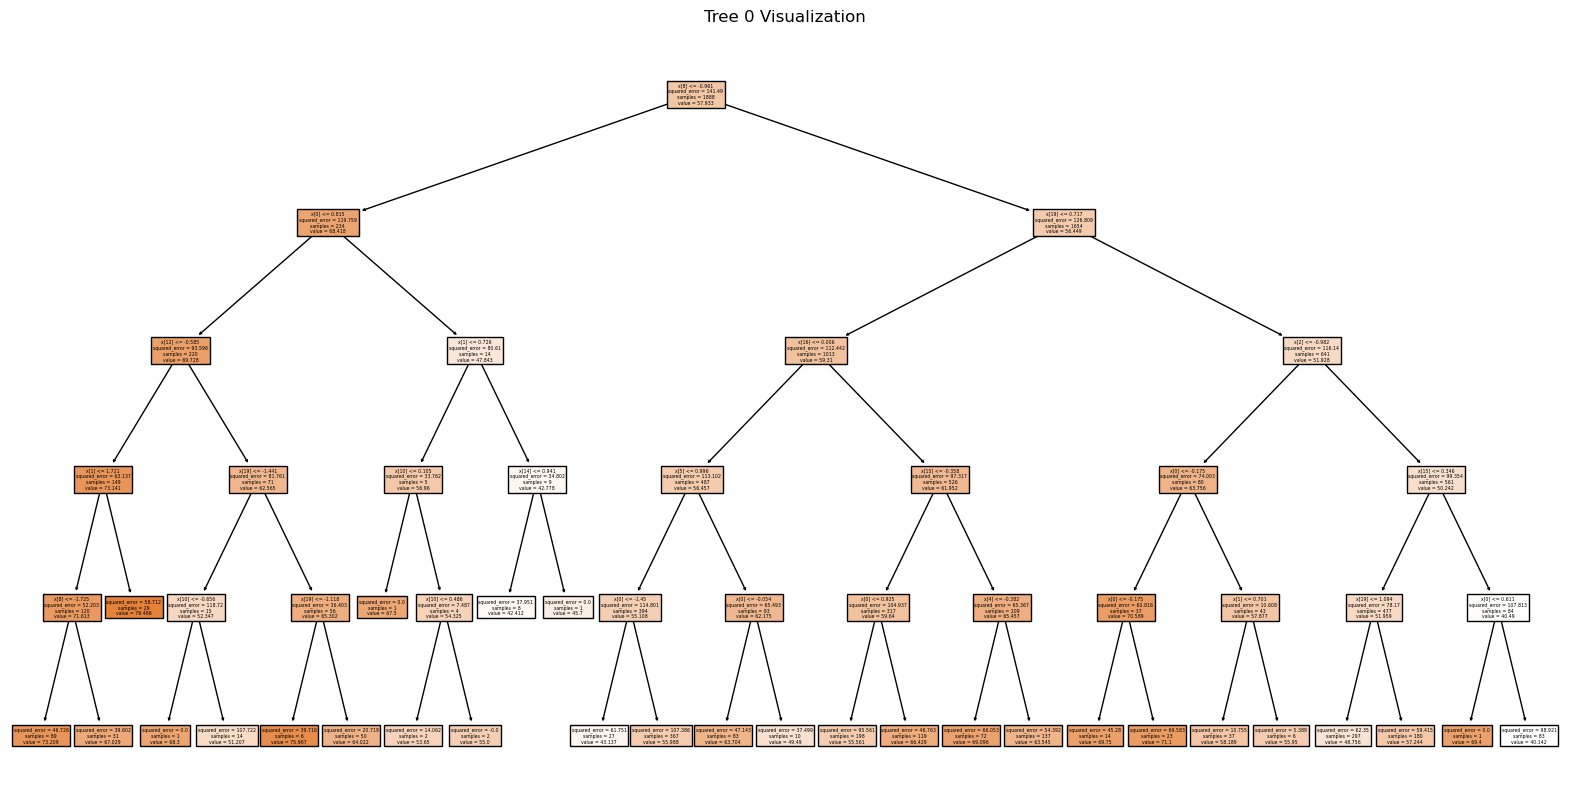

Tree 1 feature importances:
[1.80065222e-01 2.19506910e-02 9.48777048e-02 1.35217976e-05
 1.07882268e-02 2.78848131e-02 0.00000000e+00 0.00000000e+00
 2.32616740e-01 0.00000000e+00 3.05345967e-03 0.00000000e+00
 4.64214493e-02 0.00000000e+00 0.00000000e+00 1.01389689e-01
 5.66390682e-02 0.00000000e+00 0.00000000e+00 2.24299415e-01]
Tree 1 structure:
|--- feature_8 <= -0.96
|   |--- feature_0 <= 0.82
|   |   |--- feature_12 <= -0.58
|   |   |   |--- feature_1 <= 1.72
|   |   |   |   |--- feature_12 <= -1.22
|   |   |   |   |   |--- value: [67.03]
|   |   |   |   |--- feature_12 >  -1.22
|   |   |   |   |   |--- value: [73.21]
|   |   |   |--- feature_1 >  1.72
|   |   |   |   |--- value: [79.47]
|   |   |--- feature_12 >  -0.58
|   |   |   |--- feature_8 <= -2.61
|   |   |   |   |--- feature_10 <= -0.66
|   |   |   |   |   |--- value: [68.30]
|   |   |   |   |--- feature_10 >  -0.66
|   |   |   |   |   |--- value: [51.21]
|   |   |   |--- feature_8 >  -2.61
|   |   |   |   |--- feature_

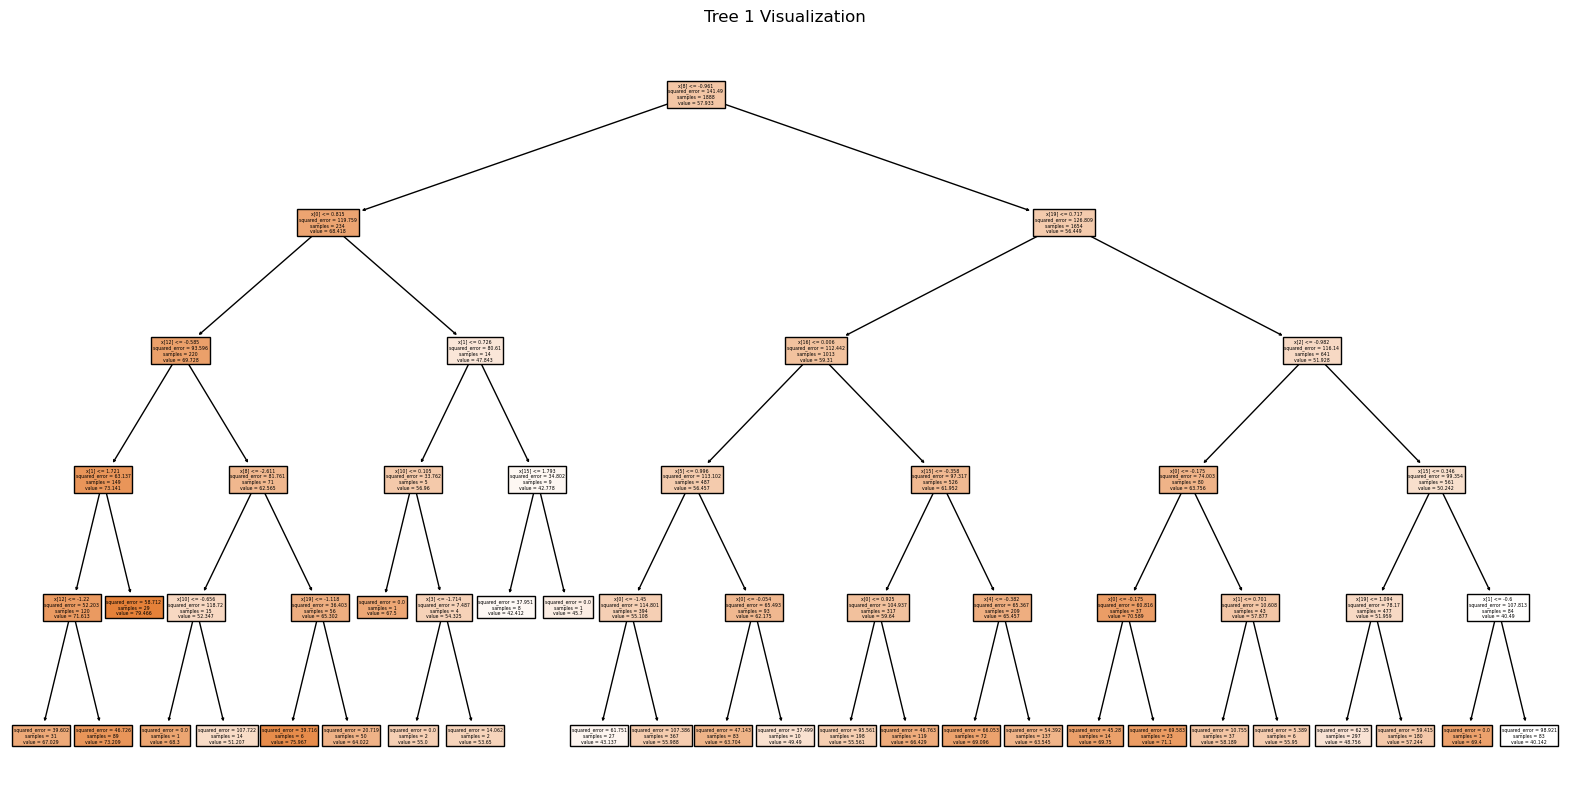

Tree 2 feature importances:
[1.88246242e-01 1.57928436e-02 9.48777048e-02 0.00000000e+00
 1.07882268e-02 2.78848131e-02 7.12764227e-05 5.67085041e-03
 2.24399343e-01 0.00000000e+00 1.03028678e-03 0.00000000e+00
 3.99065428e-02 0.00000000e+00 0.00000000e+00 1.01331934e-01
 5.66390682e-02 0.00000000e+00 0.00000000e+00 2.33360868e-01]
Tree 2 structure:
|--- feature_8 <= -0.96
|   |--- feature_0 <= 0.82
|   |   |--- feature_12 <= -0.58
|   |   |   |--- feature_1 <= 1.72
|   |   |   |   |--- feature_8 <= -1.72
|   |   |   |   |   |--- value: [73.21]
|   |   |   |   |--- feature_8 >  -1.72
|   |   |   |   |   |--- value: [67.03]
|   |   |   |--- feature_1 >  1.72
|   |   |   |   |--- value: [79.47]
|   |   |--- feature_12 >  -0.58
|   |   |   |--- feature_19 <= -1.44
|   |   |   |   |--- feature_0 <= -0.51
|   |   |   |   |   |--- value: [68.30]
|   |   |   |   |--- feature_0 >  -0.51
|   |   |   |   |   |--- value: [51.21]
|   |   |   |--- feature_19 >  -1.44
|   |   |   |   |--- feature_7 

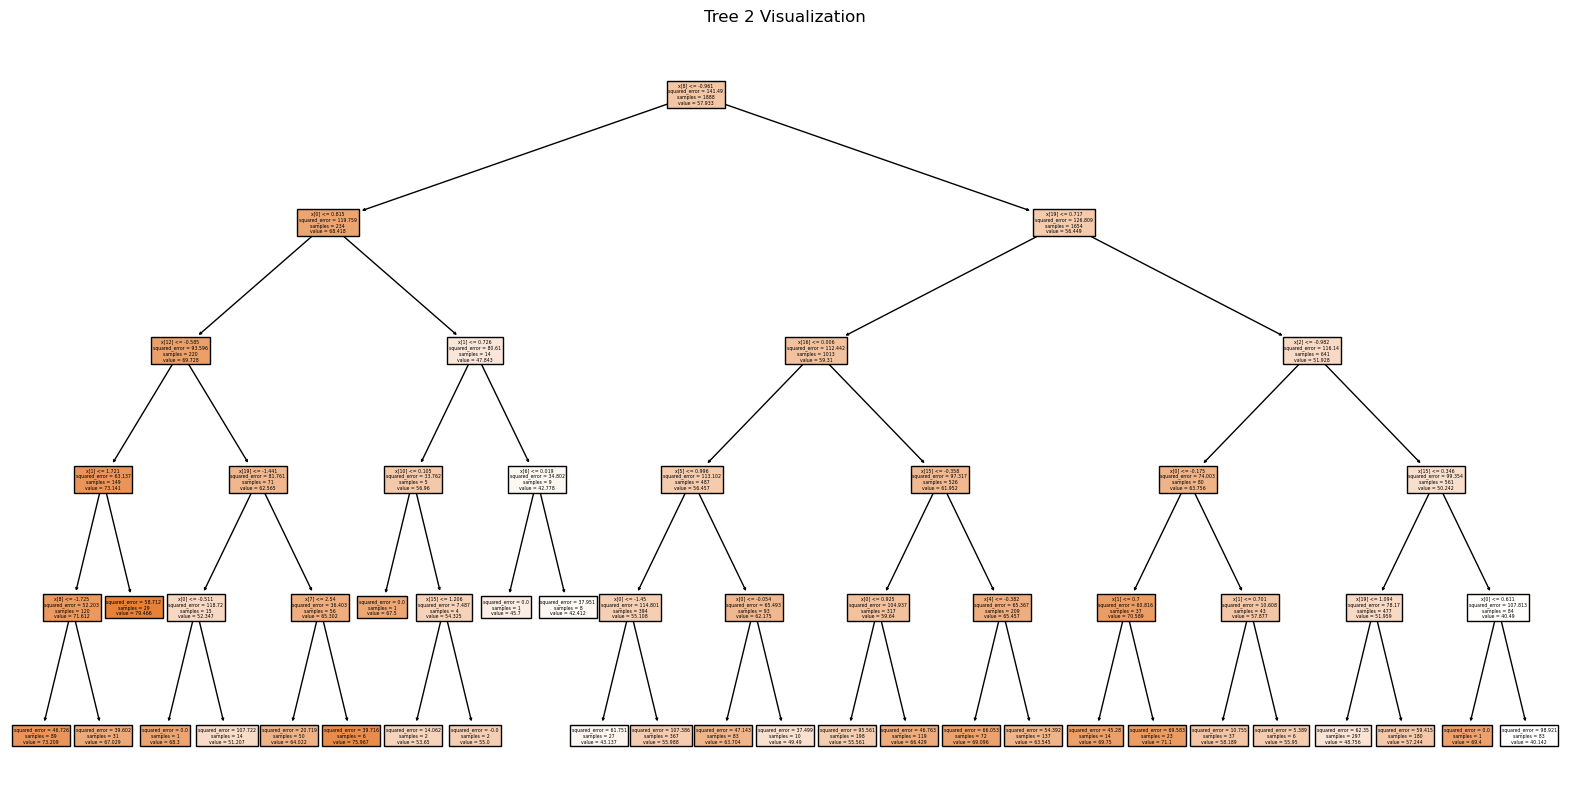

Tree 3 feature importances:
[1.86223069e-01 2.23077501e-02 9.48777048e-02 0.00000000e+00
 1.07882268e-02 2.78848131e-02 0.00000000e+00 0.00000000e+00
 2.17884437e-01 2.04031536e-02 3.05345967e-03 0.00000000e+00
 3.99065428e-02 7.12764227e-05 0.00000000e+00 3.16220818e-02
 5.66390682e-02 6.96963303e-02 0.00000000e+00 2.18642086e-01]
Tree 3 structure:
|--- feature_8 <= -0.96
|   |--- feature_0 <= 0.82
|   |   |--- feature_12 <= -0.58
|   |   |   |--- feature_1 <= 1.72
|   |   |   |   |--- feature_1 <= 0.73
|   |   |   |   |   |--- value: [73.21]
|   |   |   |   |--- feature_1 >  0.73
|   |   |   |   |   |--- value: [67.03]
|   |   |   |--- feature_1 >  1.72
|   |   |   |   |--- value: [79.47]
|   |   |--- feature_12 >  -0.58
|   |   |   |--- feature_9 <= -2.58
|   |   |   |   |--- feature_10 <= -0.66
|   |   |   |   |   |--- value: [68.30]
|   |   |   |   |--- feature_10 >  -0.66
|   |   |   |   |   |--- value: [51.21]
|   |   |   |--- feature_9 >  -2.58
|   |   |   |   |--- feature_9 <=

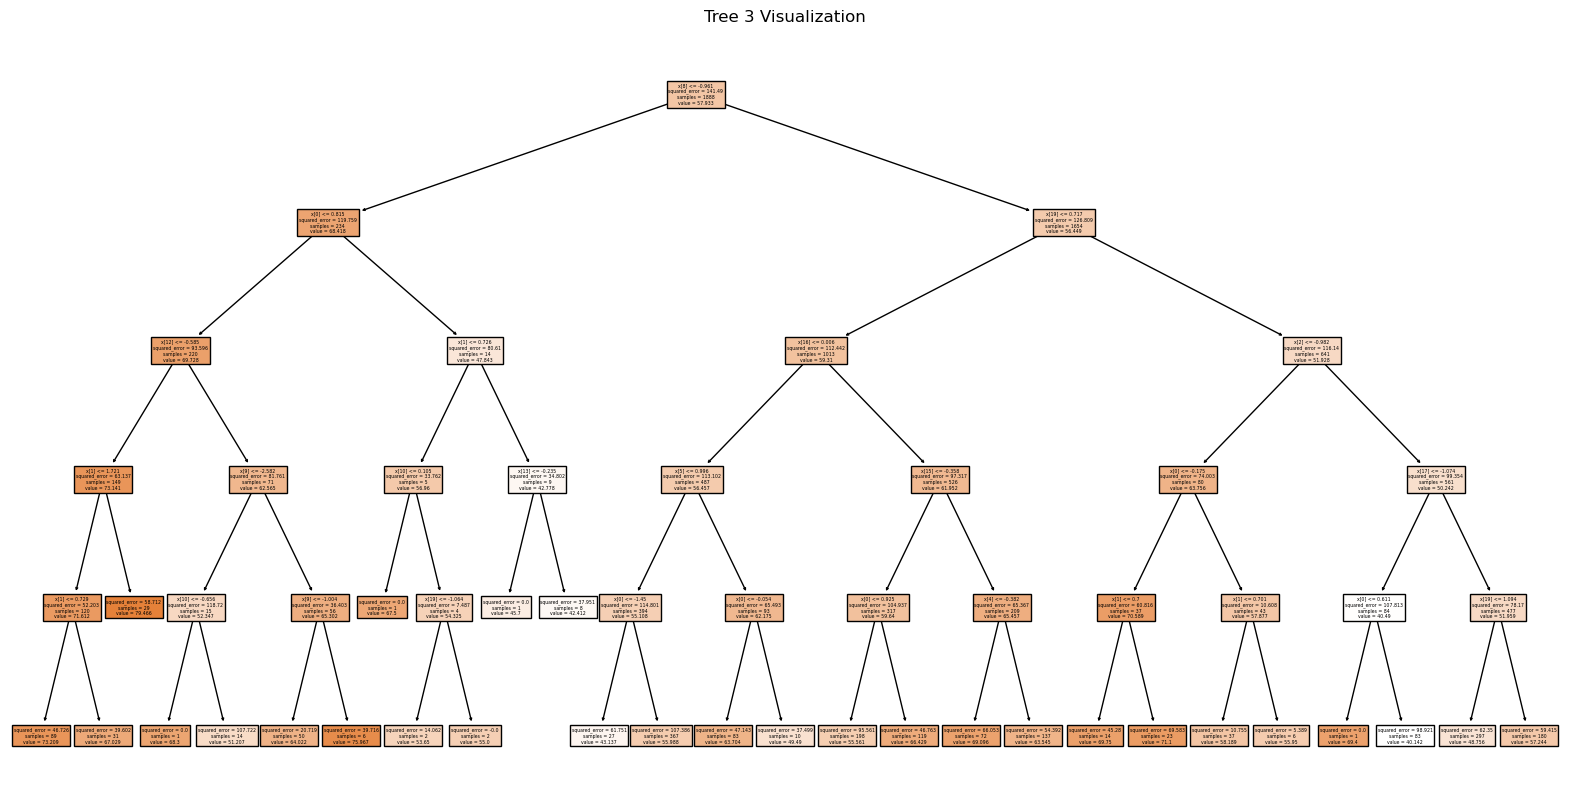

Tree 4 feature importances:
[0.18634075 0.01567517 0.0948777  0.         0.01078823 0.02788481
 0.0148171  0.         0.21788444 0.00651491 0.00305346 0.
 0.03990654 0.         0.         0.10131841 0.05663907 0.
 0.         0.22429941]
Tree 4 structure:
|--- feature_8 <= -0.96
|   |--- feature_0 <= 0.82
|   |   |--- feature_12 <= -0.58
|   |   |   |--- feature_1 <= 1.72
|   |   |   |   |--- feature_9 <= -1.69
|   |   |   |   |   |--- value: [73.21]
|   |   |   |   |--- feature_9 >  -1.69
|   |   |   |   |   |--- value: [67.03]
|   |   |   |--- feature_1 >  1.72
|   |   |   |   |--- value: [79.47]
|   |   |--- feature_12 >  -0.58
|   |   |   |--- feature_6 <= 1.01
|   |   |   |   |--- feature_19 <= -1.12
|   |   |   |   |   |--- value: [75.97]
|   |   |   |   |--- feature_19 >  -1.12
|   |   |   |   |   |--- value: [64.02]
|   |   |   |--- feature_6 >  1.01
|   |   |   |   |--- feature_10 <= -0.66
|   |   |   |   |   |--- value: [68.30]
|   |   |   |   |--- feature_10 >  -0.66
|   |   

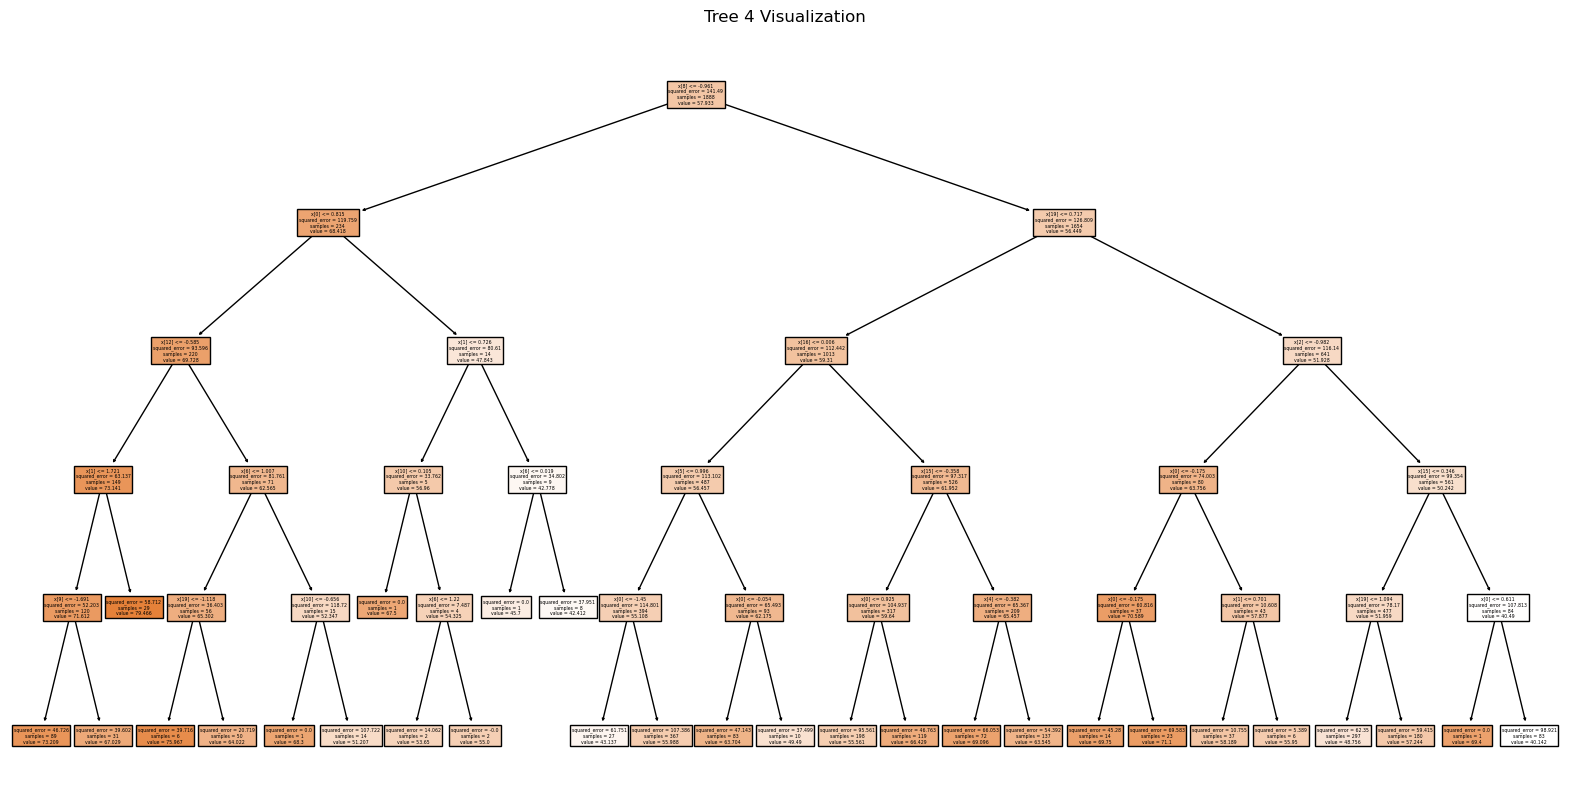

Tree 5 feature importances:
[1.80065222e-01 2.19506910e-02 9.48777048e-02 0.00000000e+00
 1.07882268e-02 2.78848131e-02 7.12764227e-05 0.00000000e+00
 2.17884437e-01 0.00000000e+00 3.05345967e-03 0.00000000e+00
 4.64214493e-02 0.00000000e+00 0.00000000e+00 3.16220818e-02
 5.66390682e-02 6.96963303e-02 0.00000000e+00 2.39045240e-01]
Tree 5 structure:
|--- feature_8 <= -0.96
|   |--- feature_0 <= 0.82
|   |   |--- feature_12 <= -0.58
|   |   |   |--- feature_1 <= 1.72
|   |   |   |   |--- feature_12 <= -1.22
|   |   |   |   |   |--- value: [67.03]
|   |   |   |   |--- feature_12 >  -1.22
|   |   |   |   |   |--- value: [73.21]
|   |   |   |--- feature_1 >  1.72
|   |   |   |   |--- value: [79.47]
|   |   |--- feature_12 >  -0.58
|   |   |   |--- feature_19 <= -1.44
|   |   |   |   |--- feature_10 <= -0.66
|   |   |   |   |   |--- value: [68.30]
|   |   |   |   |--- feature_10 >  -0.66
|   |   |   |   |   |--- value: [51.21]
|   |   |   |--- feature_19 >  -1.44
|   |   |   |   |--- featur

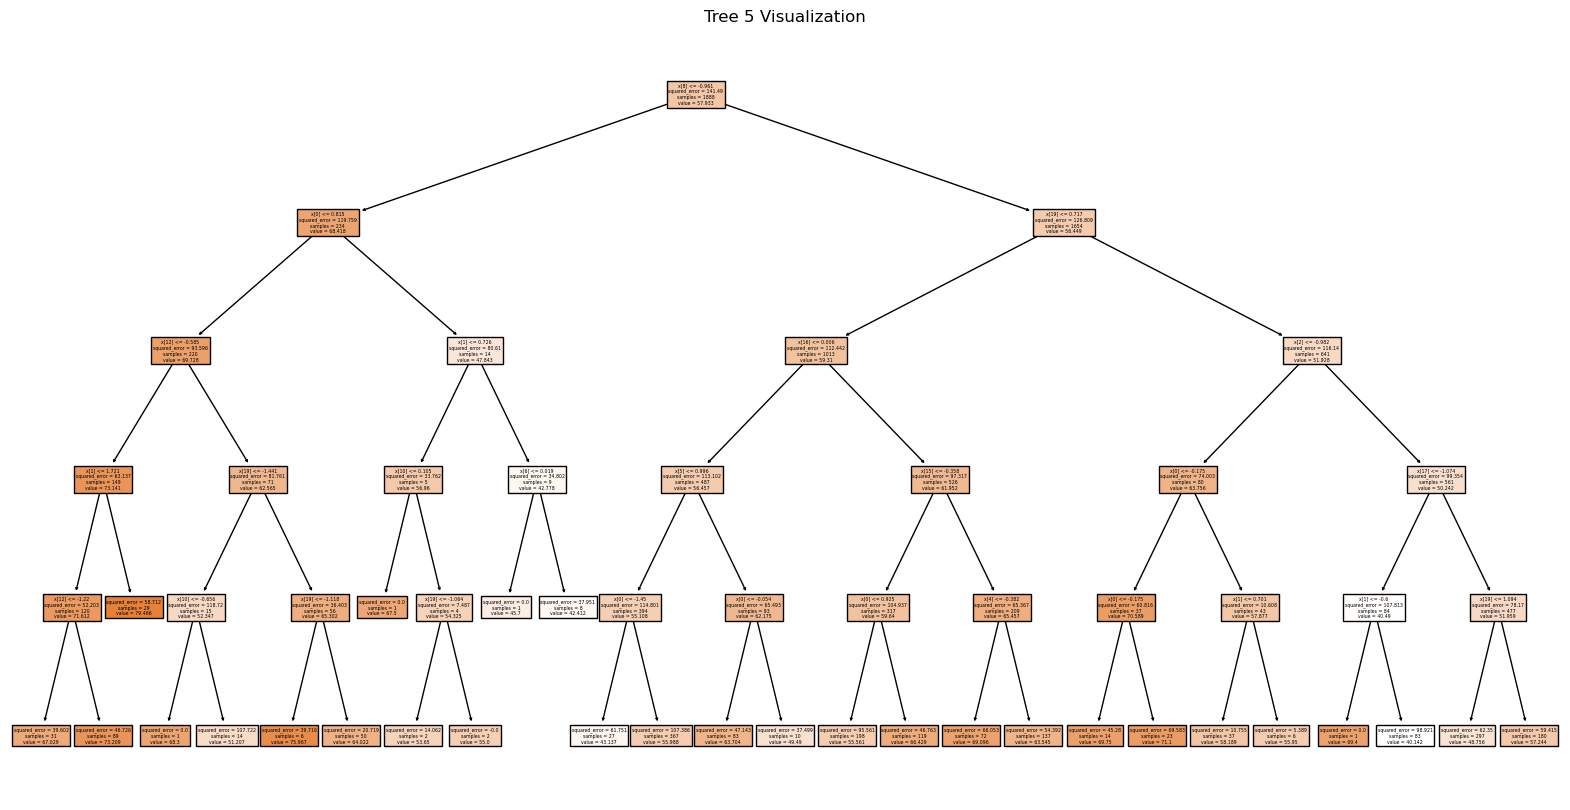

Tree 6 feature importances:
[0.18927653 0.01579284 0.0949625  0.         0.01078823 0.02788481
 0.         0.00567085 0.21788444 0.02124721 0.         0.
 0.03990654 0.         0.         0.10131841 0.05663907 0.
 0.         0.21862856]
Tree 6 structure:
|--- feature_8 <= -0.96
|   |--- feature_0 <= 0.82
|   |   |--- feature_12 <= -0.58
|   |   |   |--- feature_1 <= 1.72
|   |   |   |   |--- feature_9 <= -1.69
|   |   |   |   |   |--- value: [73.21]
|   |   |   |   |--- feature_9 >  -1.69
|   |   |   |   |   |--- value: [67.03]
|   |   |   |--- feature_1 >  1.72
|   |   |   |   |--- value: [79.47]
|   |   |--- feature_12 >  -0.58
|   |   |   |--- feature_9 <= -2.58
|   |   |   |   |--- feature_0 <= -0.51
|   |   |   |   |   |--- value: [68.30]
|   |   |   |   |--- feature_0 >  -0.51
|   |   |   |   |   |--- value: [51.21]
|   |   |   |--- feature_9 >  -2.58
|   |   |   |   |--- feature_7 <= 2.54
|   |   |   |   |   |--- value: [64.02]
|   |   |   |   |--- feature_7 >  2.54
|   |   |   

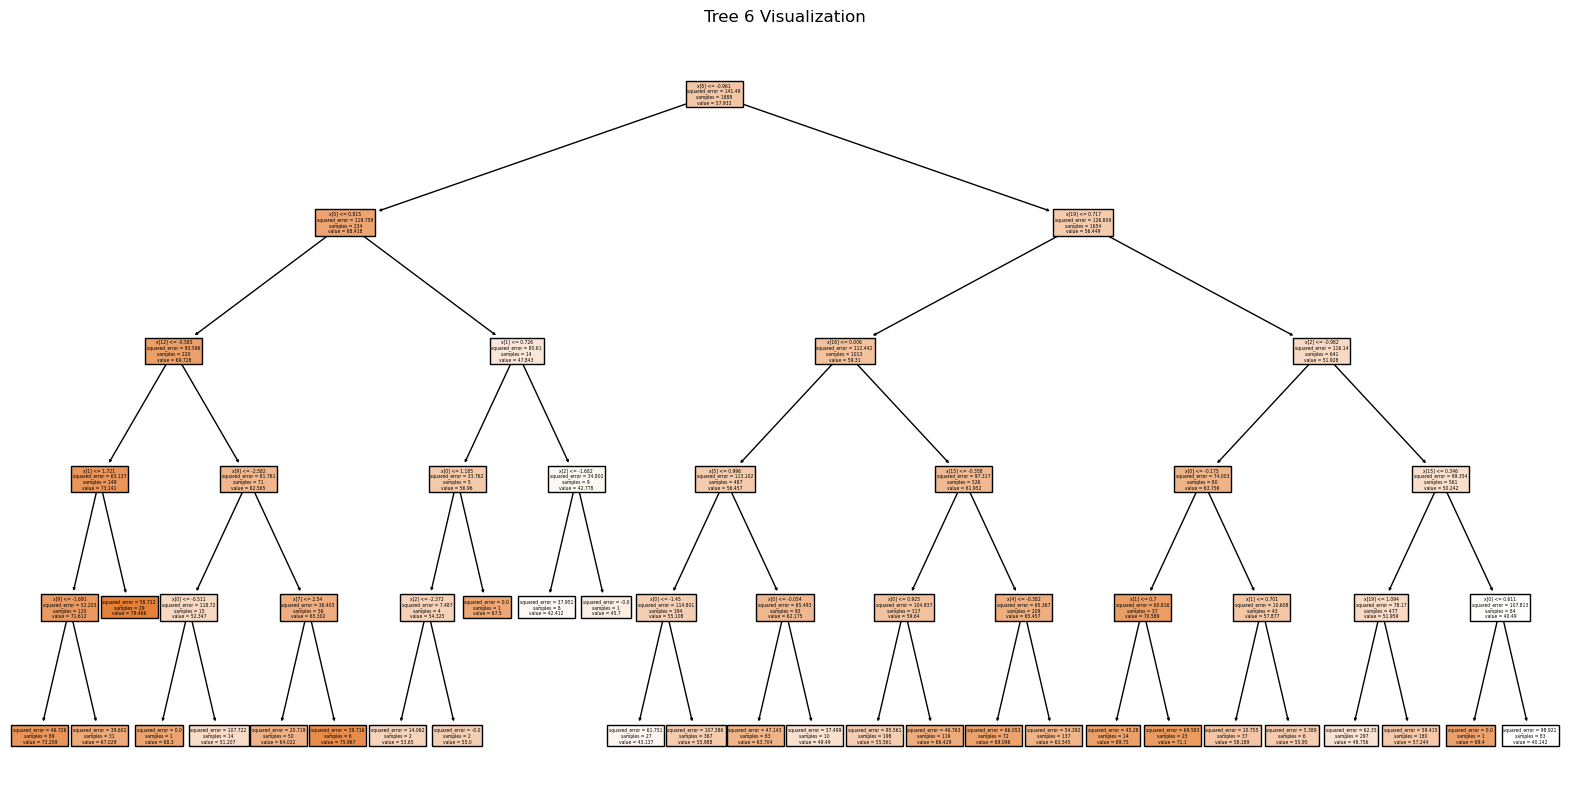

Tree 7 feature importances:
[1.80977833e-01 2.77392176e-02 9.48777048e-02 0.00000000e+00
 1.07882268e-02 3.43997196e-02 0.00000000e+00 1.35217976e-05
 2.32616740e-01 0.00000000e+00 2.02317289e-03 7.12764227e-05
 3.99065428e-02 0.00000000e+00 0.00000000e+00 3.16220818e-02
 5.66390682e-02 6.96963303e-02 0.00000000e+00 2.18628564e-01]
Tree 7 structure:
|--- feature_8 <= -0.96
|   |--- feature_0 <= 0.82
|   |   |--- feature_12 <= -0.58
|   |   |   |--- feature_1 <= 1.72
|   |   |   |   |--- feature_5 <= -0.89
|   |   |   |   |   |--- value: [67.03]
|   |   |   |   |--- feature_5 >  -0.89
|   |   |   |   |   |--- value: [73.21]
|   |   |   |--- feature_1 >  1.72
|   |   |   |   |--- value: [79.47]
|   |   |--- feature_12 >  -0.58
|   |   |   |--- feature_8 <= -2.61
|   |   |   |   |--- feature_10 <= -0.66
|   |   |   |   |   |--- value: [68.30]
|   |   |   |   |--- feature_10 >  -0.66
|   |   |   |   |   |--- value: [51.21]
|   |   |   |--- feature_8 >  -2.61
|   |   |   |   |--- feature_1 

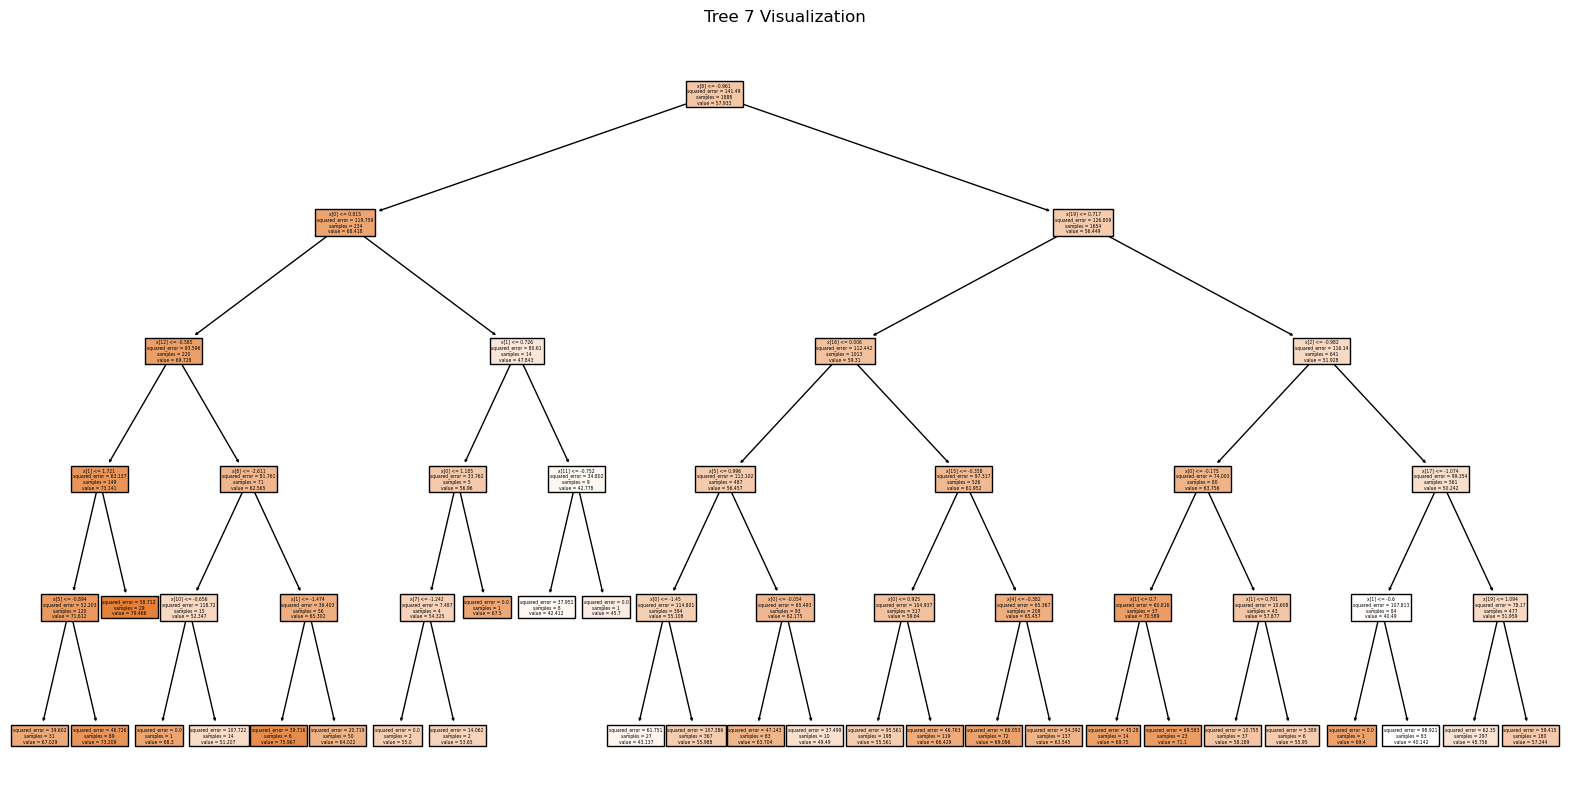

Tree 8 feature importances:
[0.18573607 0.02195069 0.10139261 0.         0.01078823 0.02788481
 0.         0.         0.21788444 0.0147323  0.00305346 0.
 0.03990654 0.         0.         0.03162208 0.05671034 0.06969633
 0.         0.21864209]
Tree 8 structure:
|--- feature_8 <= -0.96
|   |--- feature_0 <= 0.82
|   |   |--- feature_12 <= -0.58
|   |   |   |--- feature_1 <= 1.72
|   |   |   |   |--- feature_2 <= -1.22
|   |   |   |   |   |--- value: [73.21]
|   |   |   |   |--- feature_2 >  -1.22
|   |   |   |   |   |--- value: [67.03]
|   |   |   |--- feature_1 >  1.72
|   |   |   |   |--- value: [79.47]
|   |   |--- feature_12 >  -0.58
|   |   |   |--- feature_9 <= -2.58
|   |   |   |   |--- feature_10 <= -0.66
|   |   |   |   |   |--- value: [68.30]
|   |   |   |   |--- feature_10 >  -0.66
|   |   |   |   |   |--- value: [51.21]
|   |   |   |--- feature_9 >  -2.58
|   |   |   |   |--- feature_0 <= -1.27
|   |   |   |   |   |--- value: [75.97]
|   |   |   |   |--- feature_0 >  -1.27


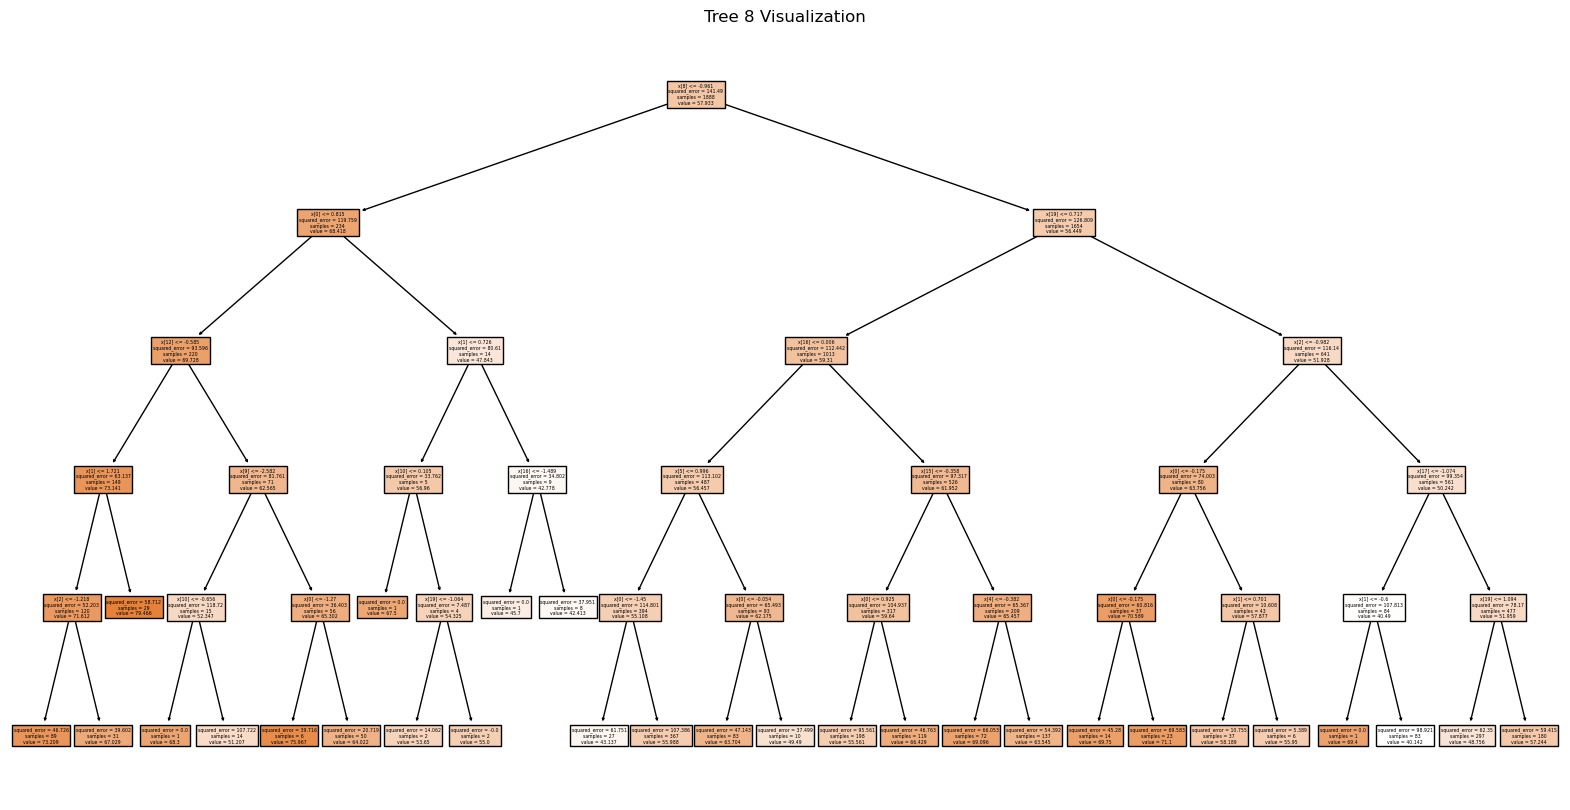

Tree 9 feature importances:
[1.88363918e-01 1.56751674e-02 9.48777048e-02 0.00000000e+00
 1.08017486e-02 2.78848131e-02 1.47323032e-02 0.00000000e+00
 2.17884437e-01 0.00000000e+00 1.03028678e-03 0.00000000e+00
 4.64214493e-02 7.12764227e-05 0.00000000e+00 1.01318412e-01
 5.66390682e-02 0.00000000e+00 0.00000000e+00 2.24299415e-01]
Tree 9 structure:
|--- feature_8 <= -0.96
|   |--- feature_0 <= 0.82
|   |   |--- feature_12 <= -0.58
|   |   |   |--- feature_1 <= 1.72
|   |   |   |   |--- feature_12 <= -1.22
|   |   |   |   |   |--- value: [67.03]
|   |   |   |   |--- feature_12 >  -1.22
|   |   |   |   |   |--- value: [73.21]
|   |   |   |--- feature_1 >  1.72
|   |   |   |   |--- value: [79.47]
|   |   |--- feature_12 >  -0.58
|   |   |   |--- feature_6 <= 1.01
|   |   |   |   |--- feature_19 <= -1.12
|   |   |   |   |   |--- value: [75.97]
|   |   |   |   |--- feature_19 >  -1.12
|   |   |   |   |   |--- value: [64.02]
|   |   |   |--- feature_6 >  1.01
|   |   |   |   |--- feature_0 

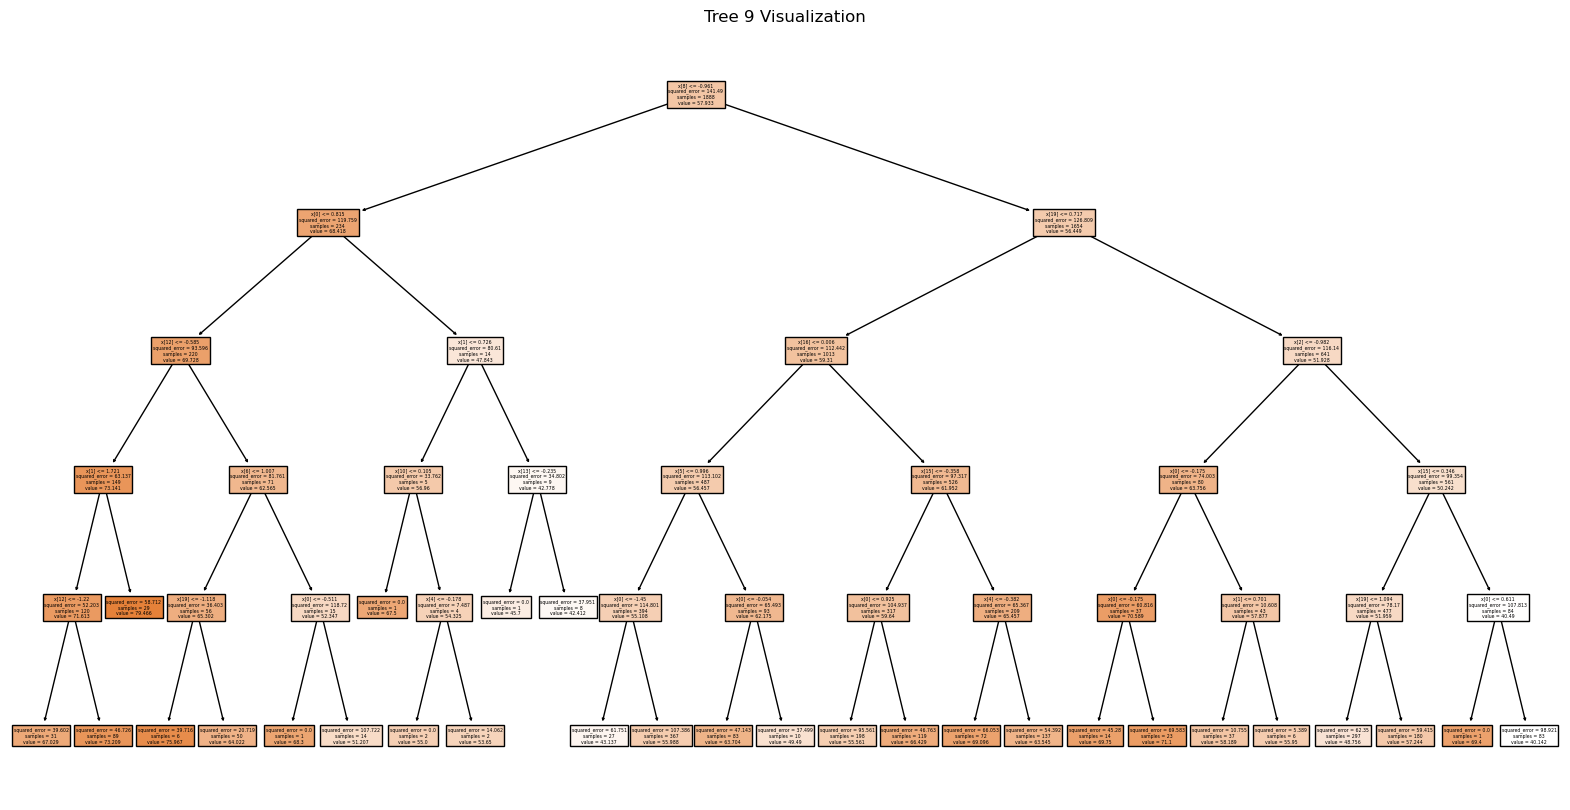

In [14]:
# Get and print tree importances
tree_importances = fonn2.get_tree_importances()